In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('IotFinalDataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242312 entries, 0 to 1242311
Data columns (total 35 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Protocol                    1242312 non-null  int64  
 1   Flow Duration               1242312 non-null  int64  
 2   Total Fwd Packet            1242312 non-null  int64  
 3   Total Length of Fwd Packet  1242312 non-null  float64
 4   Fwd Packet Length Max       1242312 non-null  float64
 5   Fwd Packet Length Min       1242312 non-null  float64
 6   Bwd Packet Length Max       1242312 non-null  float64
 7   Bwd Packet Length Min       1242312 non-null  float64
 8   Flow Bytes/s                1242312 non-null  float64
 9   Flow Packets/s              1242312 non-null  float64
 10  Flow IAT Mean               1242312 non-null  float64
 11  Flow IAT Std                1242312 non-null  float64
 12  Flow IAT Max                1242312 non-null  float64
 1

In [6]:
df.head()

,Protocol,Flow Duration,Total Fwd Packet,Total Length of Fwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Idle Mean,Idle Std,Idle Max,Connection Type,Label
0,6,379933,11,720.0,517.0,0.0,2736.0,0.0,18132.144352,57.904946,...,131,4,32,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1,Benign
1,6,205637,3,87.0,87.0,0.0,189.0,0.0,1342.170913,29.177629,...,508,1,32,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1,Benign
2,6,5030379,1,6.0,6.0,6.0,0.0,0.0,1.192753,0.596377,...,123,0,20,0.0,0.0,8.494231e+14,1.201266e+15,1.698846e+15,1,Benign
3,6,72278,3,87.0,87.0,0.0,148.0,0.0,3251.335123,96.848280,...,508,1,32,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1,Benign
4,6,2457,2,0.0,0.0,0.0,0.0,0.0,0.000000,814.000814,...,0,0,32,0.0,0.0,1.698846e+15,0.000000e+00,1.698846e+15,1,Benign


In [3]:
df.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Length of Fwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Packet Length Max',
       'Packet Length Mean', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'Down/Up Ratio',
       'Bwd Bulk Rate Avg', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Idle Mean', 'Idle Std', 'Idle Max', 'Connection Type', 'Label'],
      dtype='object')

In [4]:
for column in df.columns:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print("\n" + "=" * 50 + "\n")  # Separator for better readability


Value counts for column: Protocol
Protocol
6     818772
0     236803
17    186354
14        43
11        41
10        41
12        40
13        40
8         40
15        39
7         35
9         35
16        29
Name: count, dtype: int64


Value counts for column: Flow Duration
Flow Duration
2           8234
3           7606
1           6407
4           2212
9           1689
            ... 
1248901        1
4562621        1
28564357       1
8826752        1
3432211        1
Name: count, Length: 452930, dtype: int64


Value counts for column: Total Fwd Packet
Total Fwd Packet
1       731168
2       318728
3        52728
4        43006
5        10135
         ...  
1799         1
3661         1
3626         1
3604         1
508          1
Name: count, Length: 1143, dtype: int64


Value counts for column: Total Length of Fwd Packet
Total Length of Fwd Packet
0.000000        798589
2.000000         69805
28.000000        42317
6.000000         24678
24.000000        20049
                

## EDA

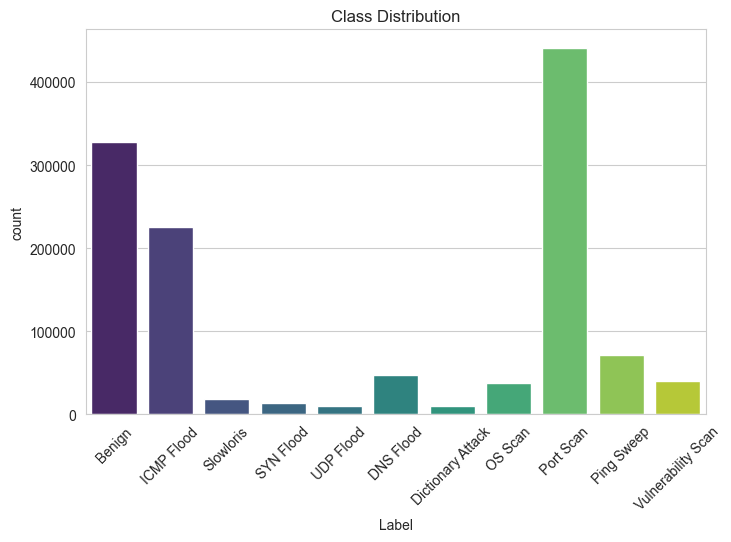

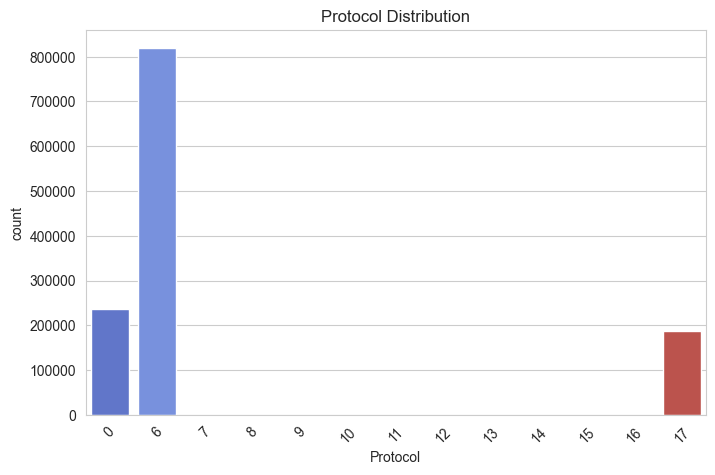

ValueError: could not convert string to float: 'Benign'

<Figure size 1200x1000 with 0 Axes>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again

# Set plot style
sns.set_style("whitegrid")

# Figure 1: Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Label"], palette="viridis")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

# Figure 2: Protocol Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Protocol"], palette="coolwarm")
plt.title("Protocol Distribution")
plt.xticks(rotation=45)
plt.show()

# Figure 3: Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Figure 4: Flow Duration Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Flow Duration"], bins=50, kde=True, color="blue")
plt.title("Flow Duration Distribution")
plt.xlabel("Flow Duration")
plt.show()

# Figure 5: Boxplot of Flow Bytes/s by Label
plt.figure(figsize=(10, 5))
sns.boxplot(x="Label", y="Flow Bytes/s", data=df, palette="Set2")
plt.yscale("log")  # Log scale for better visibility of outliers
plt.title("Flow Bytes/s Distribution by Label")
plt.xticks(rotation=45)
plt.show()

In [6]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Display dataset info
df.info()

# Display basic statistics
df.describe()

Missing values in each column:
 Protocol                      0
Flow Duration                 0
Total Fwd Packet              0
Total Length of Fwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Min         0
Bwd Packet Length Max         0
Bwd Packet Length Min         0
Flow Bytes/s                  0
Flow Packets/s                0
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Fwd IAT Std                   0
Bwd IAT Mean                  0
Bwd IAT Std                   0
Packet Length Max             0
Packet Length Mean            0
FIN Flag Count                0
SYN Flag Count                0
RST Flag Count                0
PSH Flag Count                0
Down/Up Ratio                 0
Bwd Bulk Rate Avg             0
FWD Init Win Bytes            0
Bwd Init Win Bytes            0
Fwd Act Data Pkts             0
Fwd Seg Size Min              0
Active Mean                   0
Active Std                    0
Idle Mea

,Protocol,Flow Duration,Total Fwd Packet,Total Length of Fwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Idle Mean,Idle Std,Idle Max,Connection Type
count,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,...,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06,1.242312e+06
mean,6.508061e+00,5.236924e+06,5.441429e+00,4.958543e+03,1.071115e+02,1.241559e+01,1.521328e+02,1.472337e+01,4.186044e+05,2.608972e+04,...,6.041521e+03,5.976976e+02,1.865340e+00,1.815517e+01,1.117930e+05,3.920556e+04,1.512520e+15,2.292489e+14,1.698770e+15,3.996299e-01
std,4.976577e+00,1.187986e+07,1.812002e+02,4.562733e+05,8.264563e+02,5.085445e+01,1.014274e+03,4.862048e+01,1.022538e+07,1.797960e+05,...,1.698222e+04,4.667425e+03,7.756087e+01,1.142544e+01,1.092181e+06,4.856533e+05,3.781996e+14,4.608822e+14,1.095178e+11,4.898225e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.321524e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.415706e+14,0.000000e+00,1.698671e+15,0.000000e+00
25%,6.000000e+00,3.364000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.097831e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,1.698672e+15,0.000000e+00,1.698683e+15,0.000000e+00
50%,6.000000e+00,6.656000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.156566e+02,...,1.024000e+03,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,1.698683e+15,0.000000e+00,1.698691e+15,0.000000e+00
75%,6.000000e+00,3.117256e+06,2.000000e+00,2.800000e+01,2.400000e+01,2.000000e+00,0.000000e+00,0.000000e+00,8.337571e+02,6.020470e+02,...,1.024000e+03,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,1.698770e+15,0.000000e+00,1.698847e+15,1.000000e+00
max,1.700000e+01,6.094632e+07,7.418000e+04,2.382375e+08,3.830400e+04,1.553300e+04,6.486000e+04,6.900000e+03,1.327000e+09,4.000000e+06,...,6.553500e+04,6.553500e+04,2.885900e+04,4.400000e+01,5.406848e+07,3.246857e+07,1.699037e+15,1.201401e+15,1.699037e+15,1.000000e+00


In [7]:
# Encode target labels
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Label"])

# Display class mappings
label_mapping = dict(
    zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))
)
print("Label Encoding Mapping:", label_mapping)

Label Encoding Mapping: {'Benign': 0, 'DNS Flood': 1, 'Dictionary Attack': 2, 'ICMP Flood': 3, 'OS Scan': 4, 'Ping Sweep': 5, 'Port Scan': 6, 'SYN Flood': 7, 'Slowloris': 8, 'UDP Flood': 9, 'Vulnerability Scan': 10}


In [8]:
# Select all columns except 'Label' as features
X = df.drop(columns=["Label"])

# Target variable
y = df["Label"]

# Split data into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (993849, 34)
Testing Set Shape: (248463, 34)


In [9]:
# Initialize scaler
scaler = StandardScaler()

# Fit & transform training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize SVM classifier
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

## Model Evaluation

In [ ]:
# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Save Model and Scaler

In [ ]:
import joblib

# Save model
joblib.dump(svm_model, "svm_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")

## Visualization of Performance Metrics

### (a) Confusion Matrix Plot

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=label_encoder.classes_
)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


### (b) Precision-Recall & ROC Curve

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get probabilities for positive class (if applicable)
if len(label_encoder.classes_) == 2:  # Only for binary classification
    y_prob = svm_model.decision_function(X_test_scaled)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, marker=".")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, marker=".", label=f"AUC = {roc_auc:.2f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


### (c) Feature Importance (Using Permutation Importance)

In [ ]:
from sklearn.inspection import permutation_importance

# Compute feature importance
perm_importance = permutation_importance(
    svm_model, X_test_scaled, y_test, n_repeats=10, random_state=42
)
feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Importance": perm_importance.importances_mean}
)
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Permutation)")
plt.show()